# Actividad 2_8: 

Descarga los dos ficheros adjuntos que encontrarás con la tarea. Uno de ellos contiene un dataset con el precio mensual de la cuenta de Netflix por países. El otro contiene datos sobre los salarios por países. El objetivo de esta actividad es contestar a la siguiente pregunta. ¿Existe relación entre la media o la mediana de los salarios de los países y la cuota mensual que se paga por Netflix?

Debes escribir un programa que realice las siguientes tareas:

1. Importar los dos datasets adjuntos con la tarea y guardarlos en dos Dataframes. Analiza los datos.
2. Crea un DataFrame que incluya una columna con el coste mensual de Netflix, otra con el salario medio y otra con la mediana.
3. Normaliza los datos del DataFrame creado en el punto 3. Normalizar los datos consiste en escalar los valores para que tengan un rango similar. En este caso nos sirve para poder comparar el coste mensual de Netflix con el salario de una persona (que tendrán inicialmente un rango muy distinto). Hay muchos métodos para normalizar. En pandas tenemos algunos métodos que puedes encontrar en el enlace a continuación. Puedes usar uno o probar varios. Si haces esto último debes hacer varios métodos.

https://www.geeksforgeeks.org/normalize-a-column-in-pandas/

4. Finalmente debes pintar una gráfica con los datos por países ya normalizados y contestar a la pregunta. ¿Existe relación entre lo que gana una persona en cada país y lo que debe pagar por Netflix?

              salarie  netflix bill
salarie       1.00000       0.70935
netflix bill  0.70935       1.00000


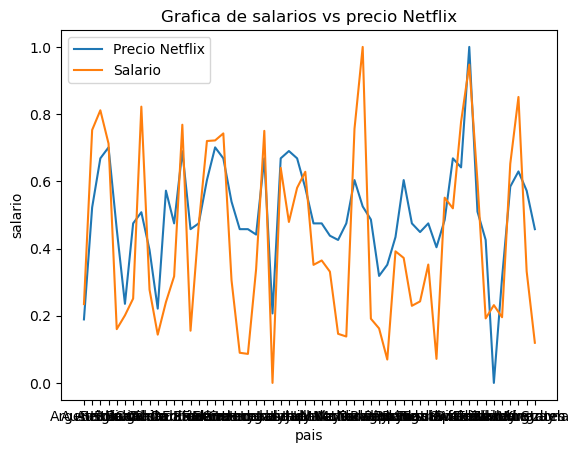

In [ ]:
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

fit_transformer = MinMaxScaler()

#Leer ficheros CSV
df_netflix = pd.read_csv("Netflix subscription fee Dec-2021.csv")
df_salaries = pd.read_csv("salaries_by_country_2021.csv")

countryList = []
salarieList = []
netflixBillList = []
fig, ax = plt.subplots()

#df_conjuto = pd.merge(df_netflix, df_salaries, left_on='Country', right_on='country', how=inner)

for index, row in df_netflix.iterrows():
    if row["Country"] in df_salaries['country'].values:
        countryList.append(row["Country"])
        salarieList.append(df_salaries.loc[df_salaries['country'] == row["Country"]].values[0][1])
        netflixBillList.append(row["Cost Per Month - Standard ($)"])



df_netflix_salaries = pd.DataFrame( {'country' : countryList ,'salarie' : salarieList,'netflix bill' : netflixBillList})
df_netflix_salaries.head()

df_netflix_salaries["salarie"] = fit_transformer.fit_transform(df_netflix_salaries["salarie"].to_numpy().reshape(-1,1))
df_netflix_salaries["netflix bill"] = fit_transformer.fit_transform(df_netflix_salaries["netflix bill"].to_numpy().reshape(-1,1))

#coords = df_netflix_salaries["salarie","netflix bill"]
print(df_netflix_salaries.corr(method='pearson', numeric_only=True))
    
ax.plot( df_netflix_salaries['country'], df_netflix_salaries['netflix bill'])
ax.plot( df_netflix_salaries['country'], df_netflix_salaries['salarie'])
ax.set_title("Grafica de salarios vs precio Netflix")
ax.set_xlabel("pais")
ax.set_ylabel("salario")
ax.legend(['Precio Netflix', 'Salario'])
plt.show()


